<a href="https://colab.research.google.com/github/tomek-l/fire/blob/master/19_07_05_Visualizing_intermediate_activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
from tensorflow.keras.models import load_model

model = load_model('/gdrive/My Drive/FireVideo/binary_classifier_from_scratch_25epochs.h5')

In [0]:
!ls '/gdrive/My Drive/FireVideo/binary_dataset/validation/positives'

00255.jpg  01696.jpg  03198.jpg  05407.jpg  06716.jpg  07834.jpg  08924.jpg
00289.jpg  01888.jpg  03215.jpg  05518.jpg  06724.jpg  07965.jpg  08944.jpg
00351.jpg  02099.jpg  04512.jpg  05540.jpg  06847.jpg  07966.jpg  09011.jpg
00373.jpg  02211.jpg  04533.jpg  05571.jpg  06962.jpg  07976.jpg  09053.jpg
00377.jpg  02329.jpg  04554.jpg  05598.jpg  07100.jpg  08044.jpg  09069.jpg
00871.jpg  02530.jpg  04584.jpg  05703.jpg  07111.jpg  08144.jpg  09072.jpg
00893.jpg  02665.jpg  04588.jpg  05723.jpg  07215.jpg  08157.jpg  09105.jpg
00930.jpg  02712.jpg  04623.jpg  05821.jpg  07277.jpg  08326.jpg  09108.jpg
01233.jpg  02743.jpg  04665.jpg  05869.jpg  07330.jpg  08439.jpg  09279.jpg
01293.jpg  02765.jpg  04768.jpg  05883.jpg  07581.jpg  08560.jpg
01351.jpg  02776.jpg  04777.jpg  06119.jpg  07637.jpg  08640.jpg
01363.jpg  02800.jpg  05172.jpg  06179.jpg  07690.jpg  08781.jpg
01387.jpg  02899.jpg  05265.jpg  06216.jpg  07751.jpg  08888.jpg
01623.jpg  02985.jpg  05274.jpg  06234.jpg  07832.jpg  0

In [0]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/gdrive/My Drive/FireVideo/binary_dataset/validation/positives/07111.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255. #(the network is trained on 0.0-1.0 inputs)

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


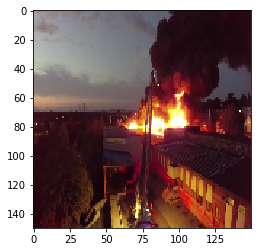

In [0]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
model.layers

In [0]:
model.layers[0].output

<tf.Tensor 'conv2d_4_4/Relu:0' shape=(?, 148, 148, 32) dtype=float32>

In [0]:
from tensorflow.keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0     

In [0]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


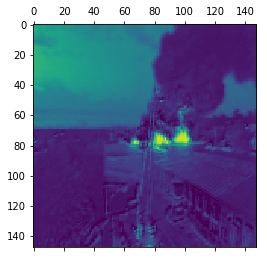

In [0]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()


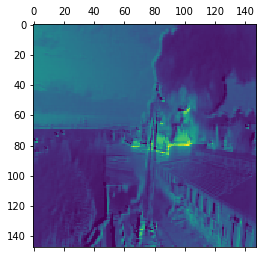

In [0]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


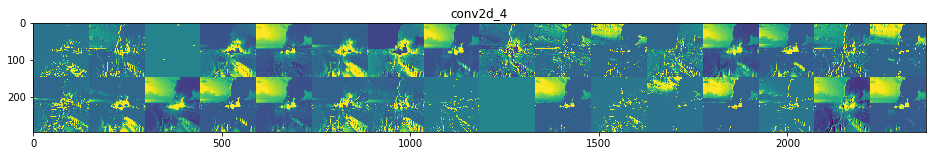

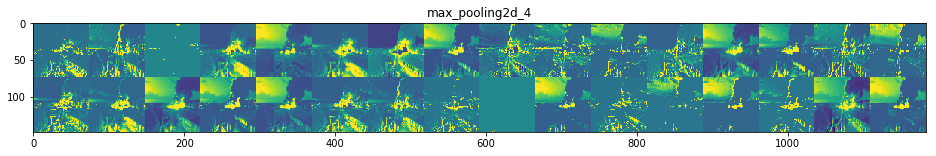

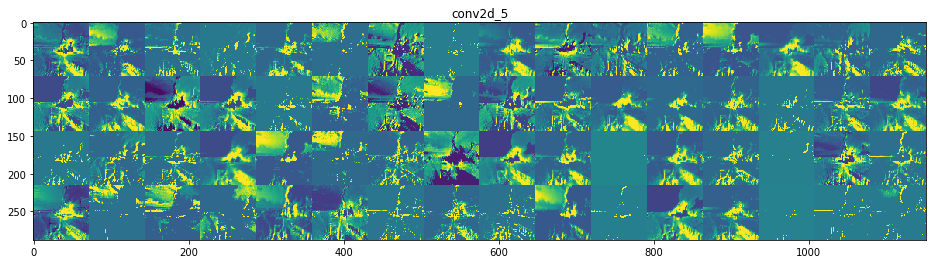

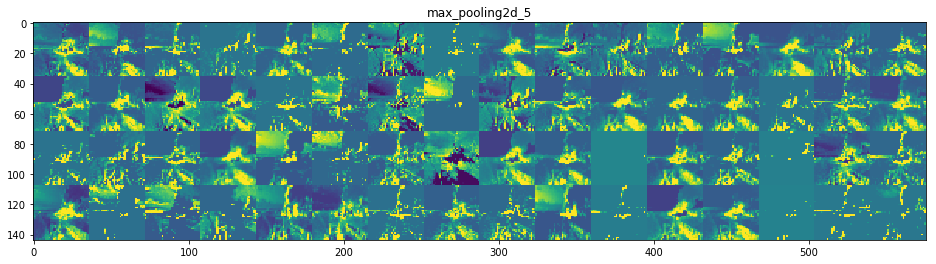

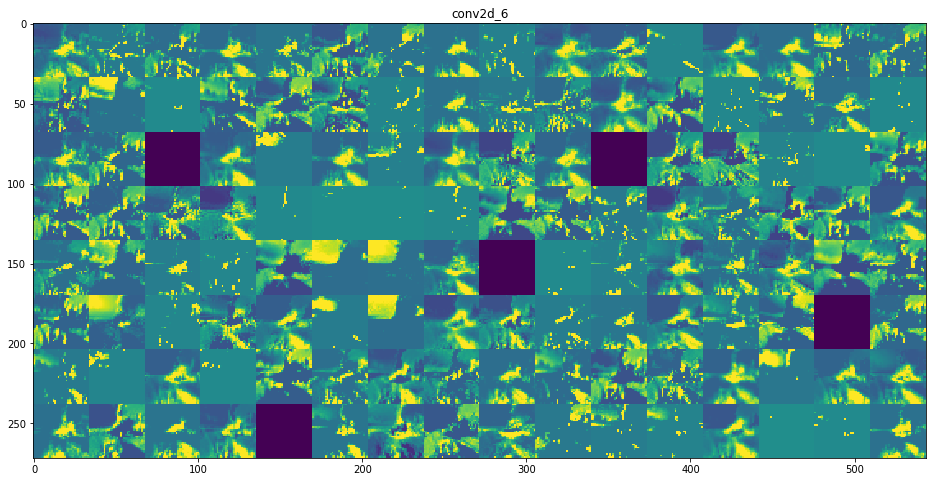

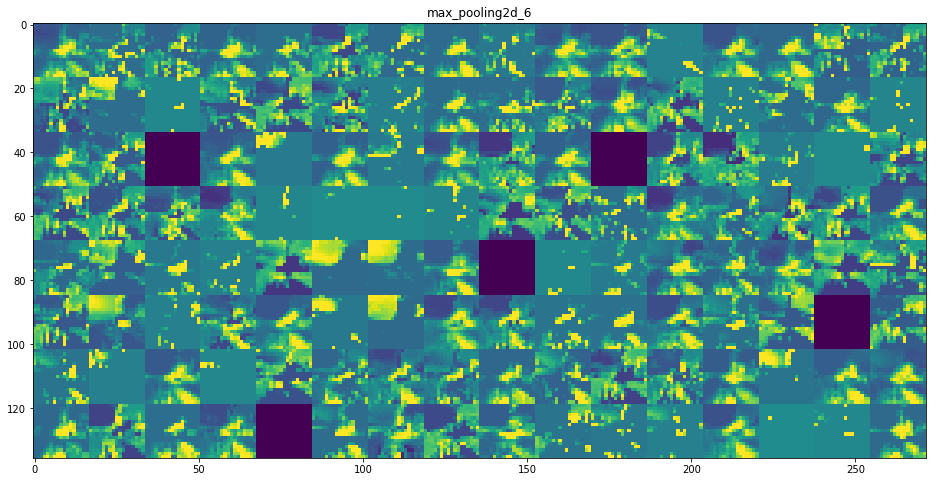

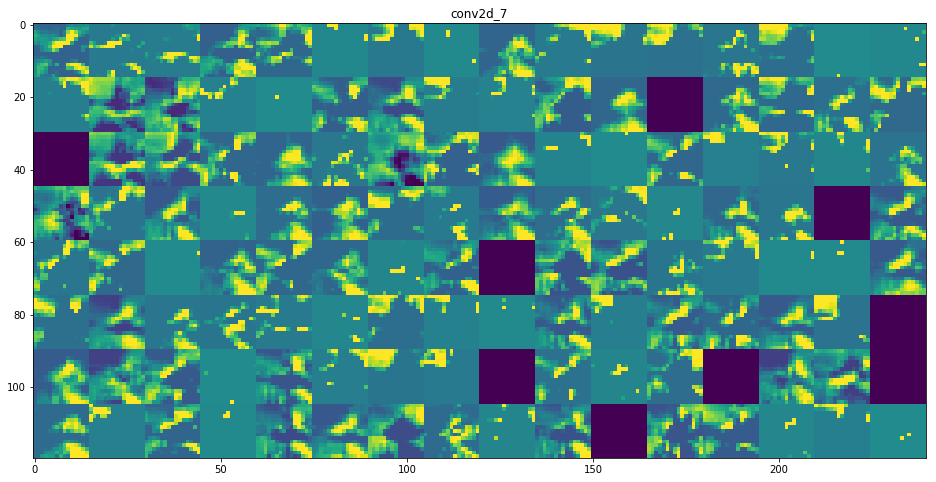

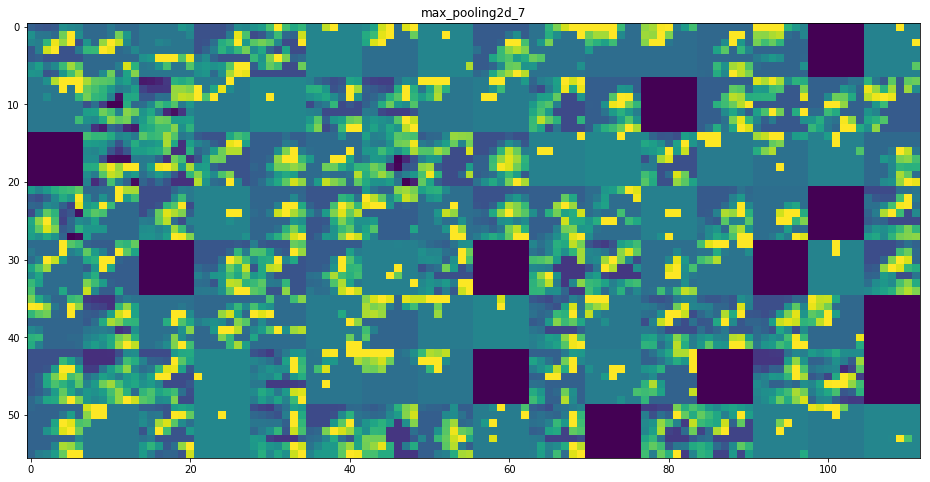

In [0]:
import tensorflow.keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()